<a href="https://colab.research.google.com/github/omar-ahmd/Kidney-Disease-classification/blob/main/Kidney_Disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining Project**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d mansoordaku/ckdisease
! unzip "/content/ckdisease.zip"

  0% 0.00/9.51k [00:00<?, ?B/s]
100% 9.51k/9.51k [00:00<00:00, 18.6MB/s]
Archive:  /content/ckdisease.zip
  inflating: kidney_disease.csv      


**Attribute Information:**

We use 24 + class = 25 ( 11 numeric ,14 nominal)
- Age(numerical) age in years
- Blood Pressure(numerical) bp in mm/Hg
- Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
- Albumin(nominal) al - (0,1,2,3,4,5)
- Sugar(nominal) su - (0,1,2,3,4,5)
- Red Blood Cells(nominal) rbc - (normal,abnormal)
- Pus Cell (nominal) pc - (normal,abnormal)
- Pus Cell clumps(nominal) pcc - (present,notpresent)
- Bacteria(nominal) ba - (present,notpresent)
- Blood Glucose Random(numerical) bgr in mgs/dl
- Blood Urea(numerical) bu in mgs/dl
- Serum Creatinine(numerical) sc in mgs/dl
- Sodium(numerical) sod in mEq/L
- Potassium(numerical) pot in mEq/L
- Hemoglobin(numerical) hemo in gms
- Packed Cell Volume(numerical)
- White Blood Cell Count(numerical) wc in cells/cumm
- Red Blood Cell Count(numerical) rc in millions/cmm
- Hypertension(nominal) htn - (yes,no)
- Diabetes Mellitus(nominal) dm - (yes,no)
- Coronary Artery Disease(nominal) cad - (yes,no)\
- Appetite(nominal) appet - (good,poor)
- Pedal Edema(nominal) pe - (yes,no)
- Anemia(nominal) ane - (yes,no)
- Class (nominal) class - (ckd,notckd)

In [ ]:
df = pd.read_csv('/content/kidney_disease.csv')
df.drop('id',axis=1,inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

## **Preprocessing**

### **Clean the data from some unwanted characters**

In [ ]:
dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
numAtt=[]
catAtt=[]

for key in dtypes:
  if(dtypes[key] == 'object'):
    df[key] = df[key].str.strip()  #detect the unwanted spaces in our data and clean it
    df.loc[(df[key] == "?"),key] = np.nan #after removing \t and spaces we transform ? to nan
    uniqueValues = df[key].dropna().unique() # drop nan values to detect only the classes
    if(len(uniqueValues)>2): 
      df = df.astype({key: 'float64'})
      numAtt.append(key)
    else:
      catAtt.append(key)
  else: 
      numAtt.append(key)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### **Transform binary categories to 1/0**

In [ ]:

dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
objAttr=[]
numAttr=[]
binaryObjects=[]
for key in dtypes:
  if(dtypes[key] == 'object' ):
    objAttr.append(key)
    uniqueValues = df[key].dropna().unique() # drop nan values to detect only the classes
    if(len(uniqueValues)==2): 
      binaryObjects.append({key:uniqueValues}) # find objects that have 2 class to transform them to 0/1
      if uniqueValues[0]=='yes' or uniqueValues[0]=='good' or uniqueValues[0]=='ckd' or uniqueValues[0]=='present' or uniqueValues[0]=='normal':
        df.loc[(df[key] == uniqueValues[0]),key]=1
        df.loc[(df[key] == uniqueValues[1]),key]=0
      else: 
        df.loc[(df[key] == uniqueValues[0]),key]=0
        df.loc[(df[key] == uniqueValues[1]),key]=1
      df[key] = df[key].astype(float)
  else:  
    numAttr.append(key)
a=numAttr.copy()
a.extend(objAttr)
df = df[a]

df['su'] = df['su'].astype(float)
df['al'] = df['al'].astype(float)

In [ ]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### **Identifying outliers**

Res: 

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

#### Standard Deviation Method

Identified outliers in age: 0 []
Identified outliers in bp: 2 [140.0, 180.0]
Identified outliers in sg: 0 []
Identified outliers in bgr: 2 [490.0, 490.0]
Identified outliers in bu: 3 [391.0, 322.0, 309.0]
Identified outliers in sc: 3 [76.0, 32.0, 48.1]
Identified outliers in sod: 1 [4.5]
Identified outliers in pot: 2 [39.0, 47.0]
Identified outliers in hemo: 0 []
Identified outliers in pcv: 0 []
Identified outliers in wc: 2 [21600.0, 26400.0]
Identified outliers in rc: 0 []


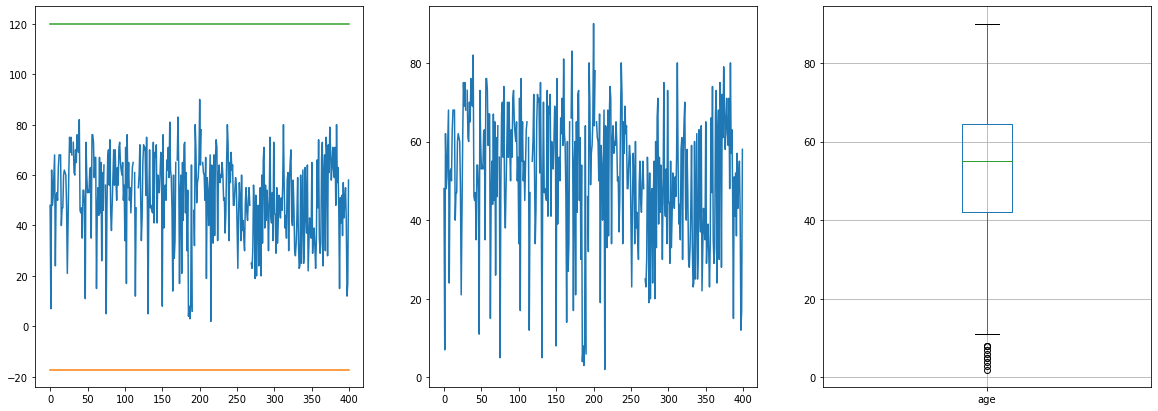

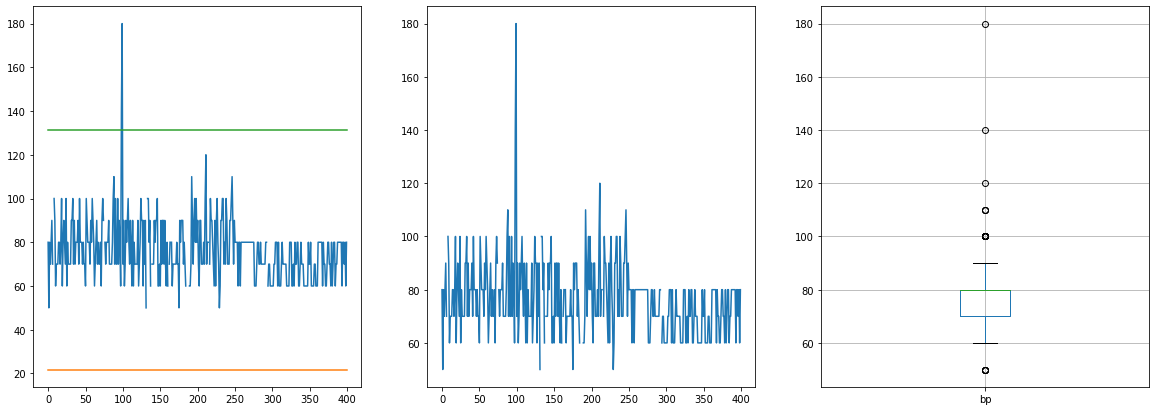

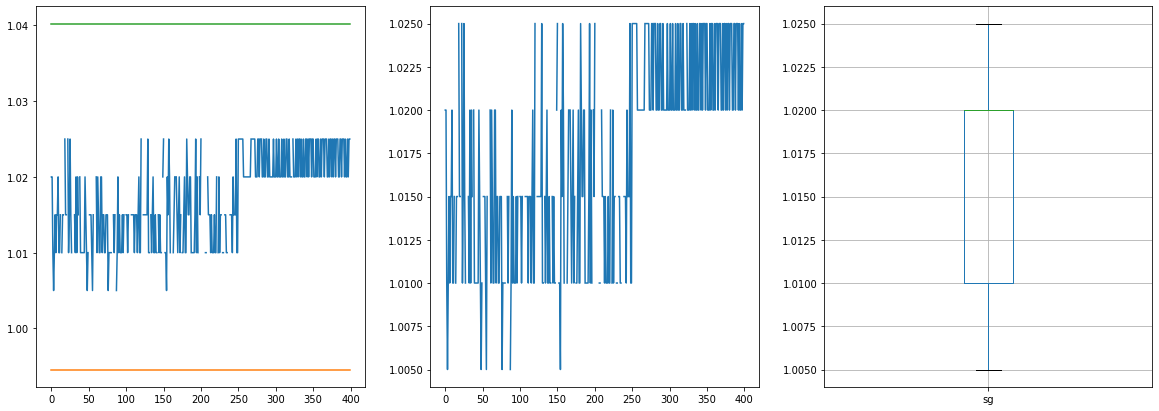

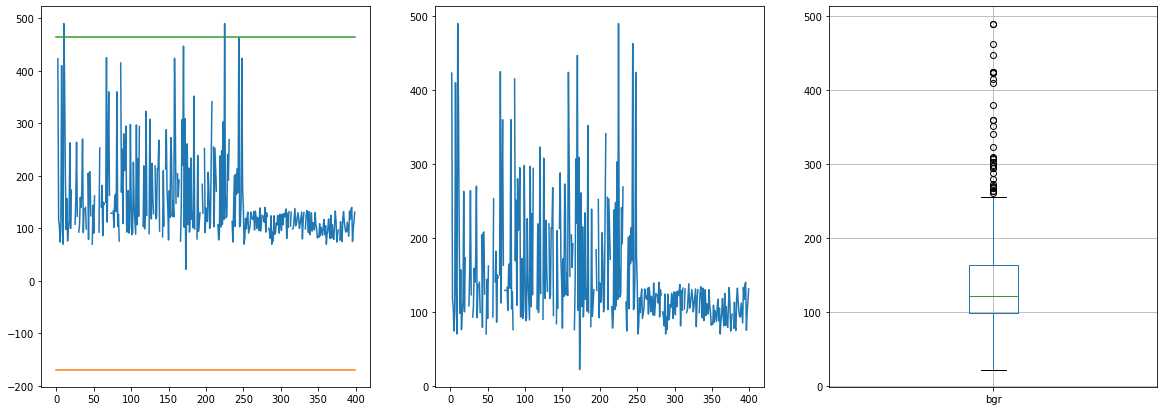

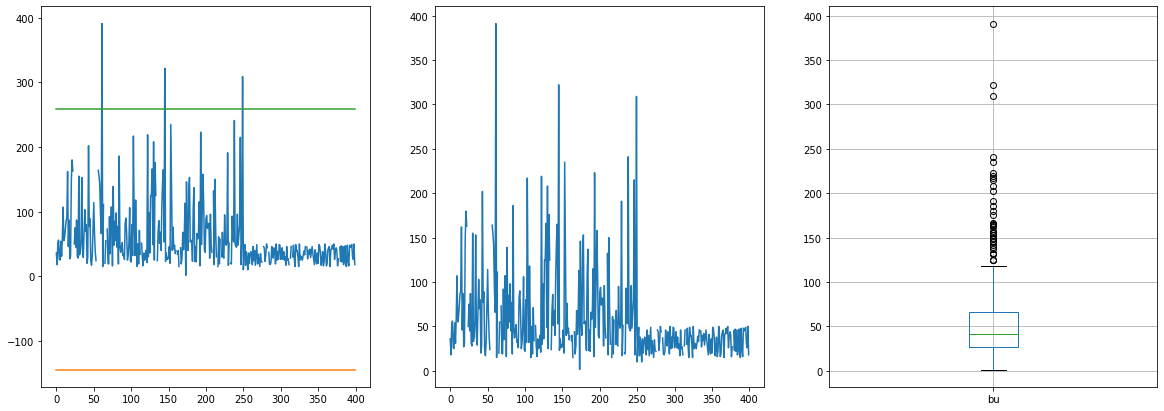

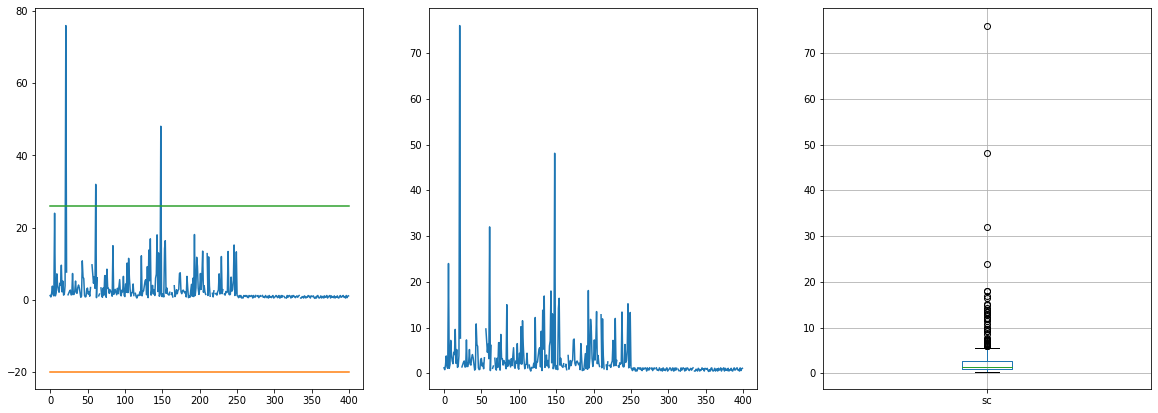

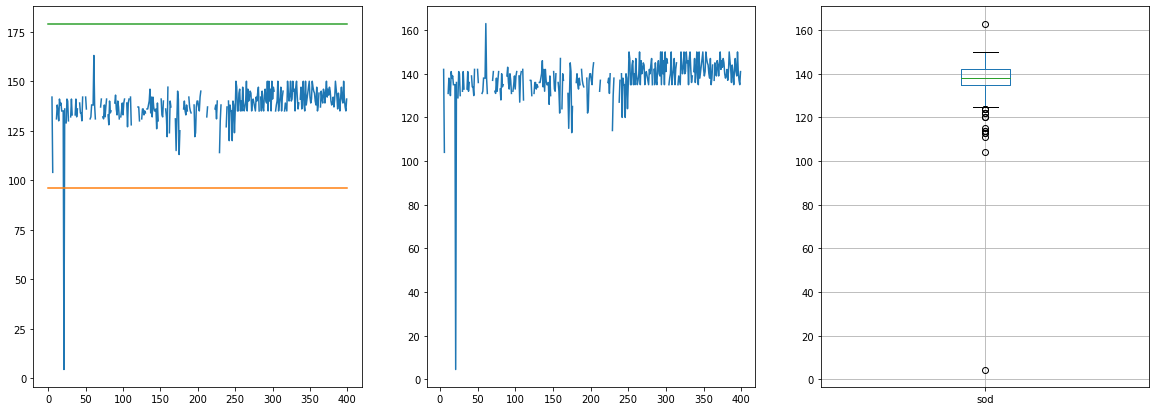

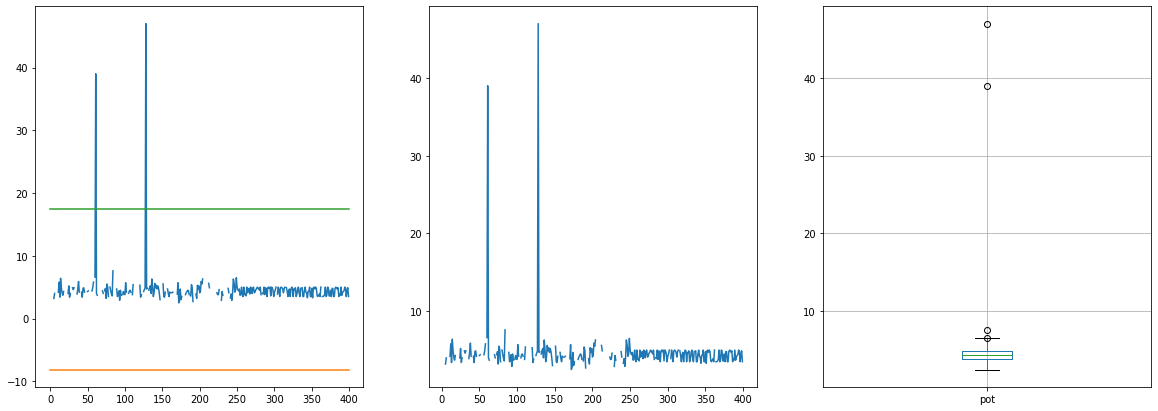

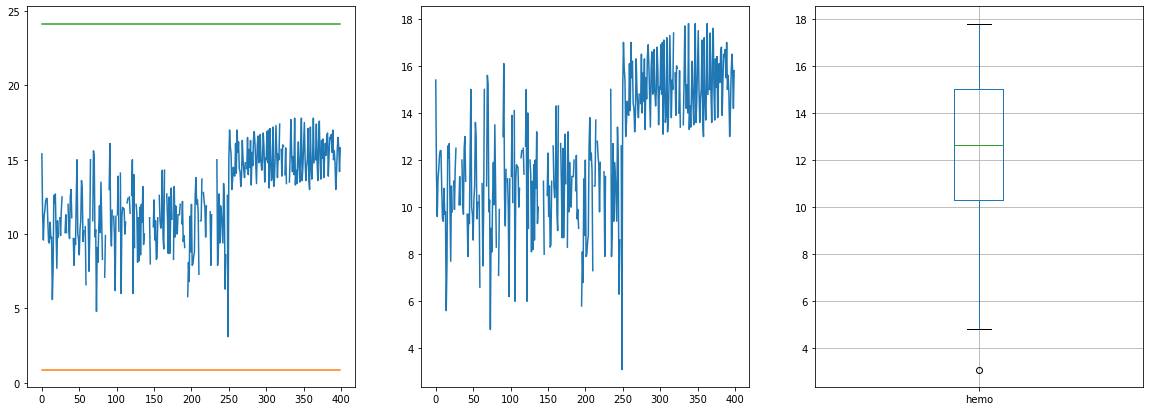

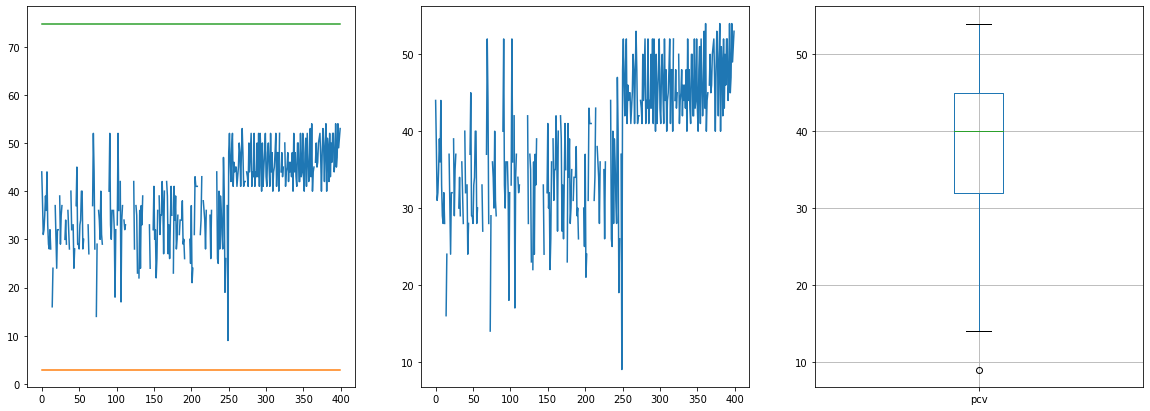

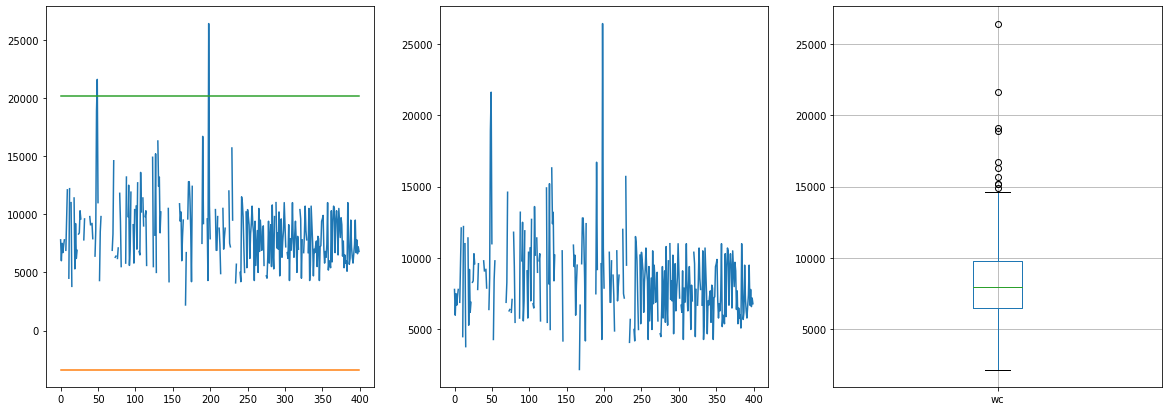

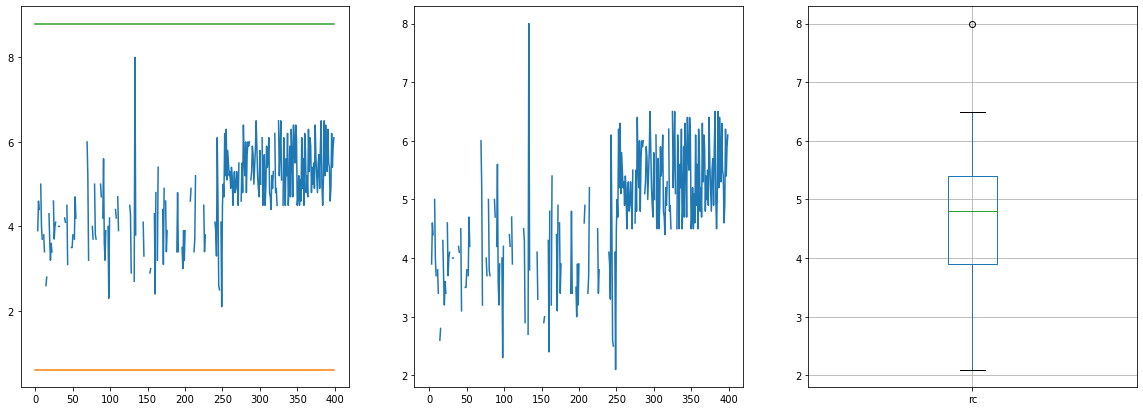

In [ ]:
dtypes = df.dtypes.apply(lambda x: x.name).to_dict()


i=0

for key in dtypes:
  if(key in numAtt and key != "al" and key != "su"):
    fig = plt.figure(i,figsize=(20,7))
    ax = fig.add_subplot(1, 3, 1)
    i+=1
    ax.plot(df[key])

    data_mean, data_std = np.mean(df[key]), np.std(df[key])
    cut_off = data_std * 4
    lower, upper = data_mean - cut_off, data_mean + cut_off
    ax.plot(lower*np.ones(400))
    ax.plot(upper*np.ones(400))
    outliers = [x for x in df[key] if x < lower or x > upper]
    outliers_removed = [x for x in df[key] if x > lower and x < upper]

    
    #df.loc[(df[key] > upper),key] = np.nan
    #df.loc[(df[key] < lower),key] = np.nan

    ax = fig.add_subplot(1, 3, 2)
    ax.plot(df[key])
    ax = fig.add_subplot(1, 3, 3)
    df.boxplot(key)
    print('Identified outliers in {}: {} {}'.format(key,len(outliers),outliers))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   bgr             356 non-null    float64
 6   bu              381 non-null    float64
 7   sc              383 non-null    float64
 8   sod             313 non-null    float64
 9   pot             312 non-null    float64
 10  hemo            348 non-null    float64
 11  pcv             329 non-null    float64
 12  wc              294 non-null    float64
 13  rc              269 non-null    float64
 14  rbc             248 non-null    float64
 15  pc              335 non-null    float64
 16  pcc             396 non-null    float64
 17  ba              396 non-null    flo

#### Interquartile Range Method

Identified outliers in age: 0 []
Identified outliers in bp: 2 [140.0, 180.0]
Identified outliers in bgr: 0 []
Identified outliers in bu: 2 [391.0, 322.0]
Identified outliers in sc: 4 [24.0, 76.0, 32.0, 48.1]
Identified outliers in sod: 1 [4.5]
Identified outliers in pot: 2 [39.0, 47.0]
Identified outliers in hemo: 0 []
Identified outliers in pcv: 0 []
Identified outliers in wc: 2 [21600.0, 26400.0]
Identified outliers in rc: 0 []
[  6  21  49  61  98  99 128 145 148 198]


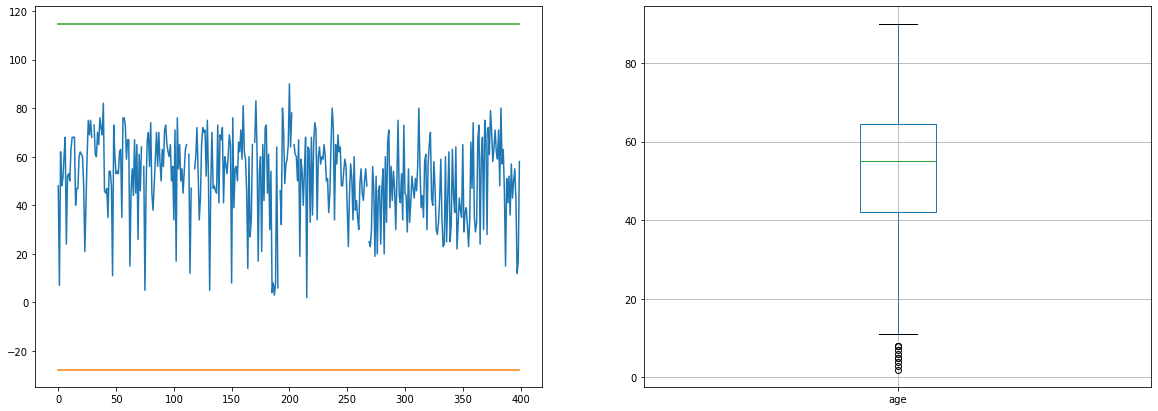

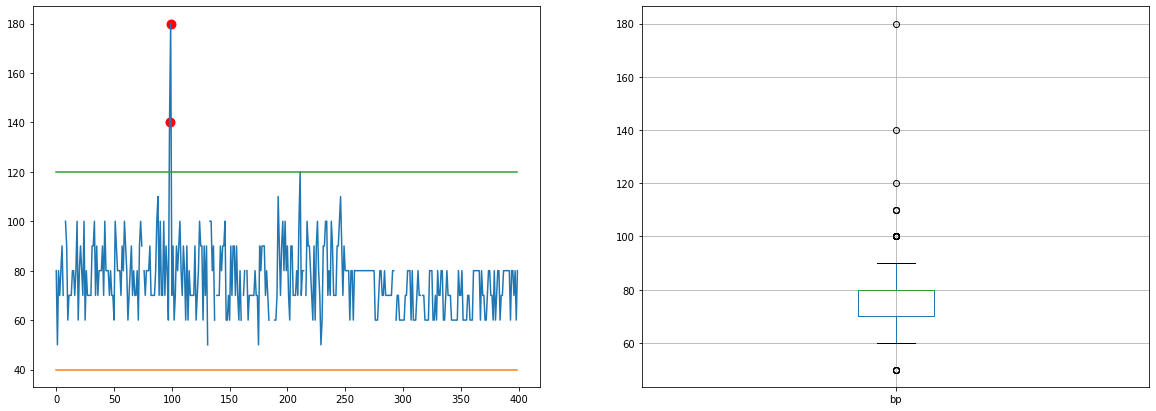

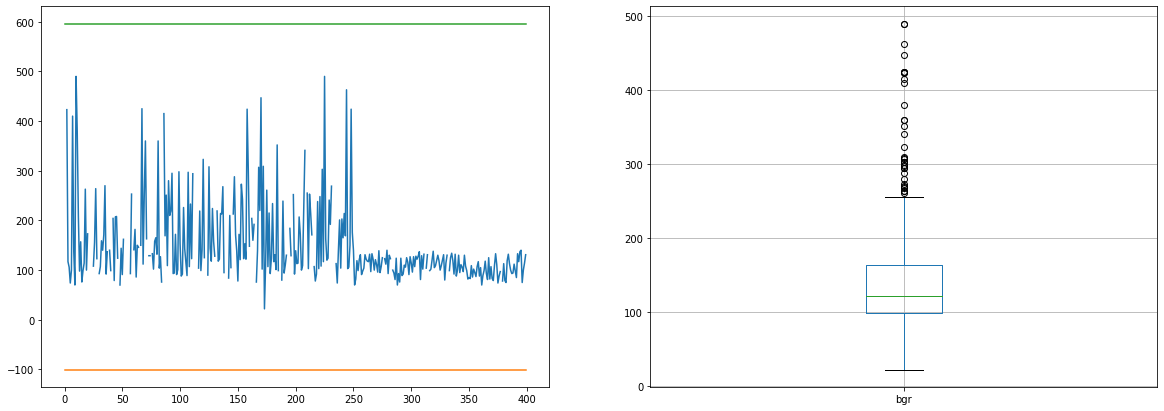

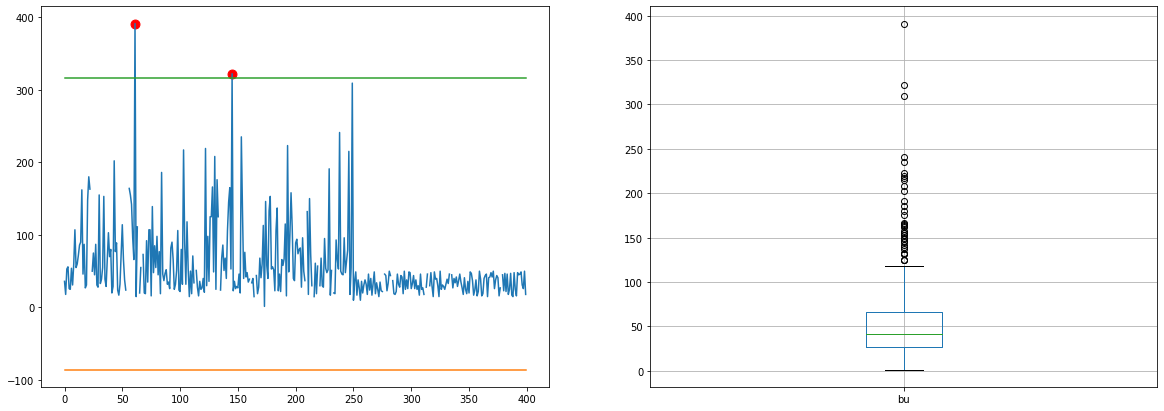

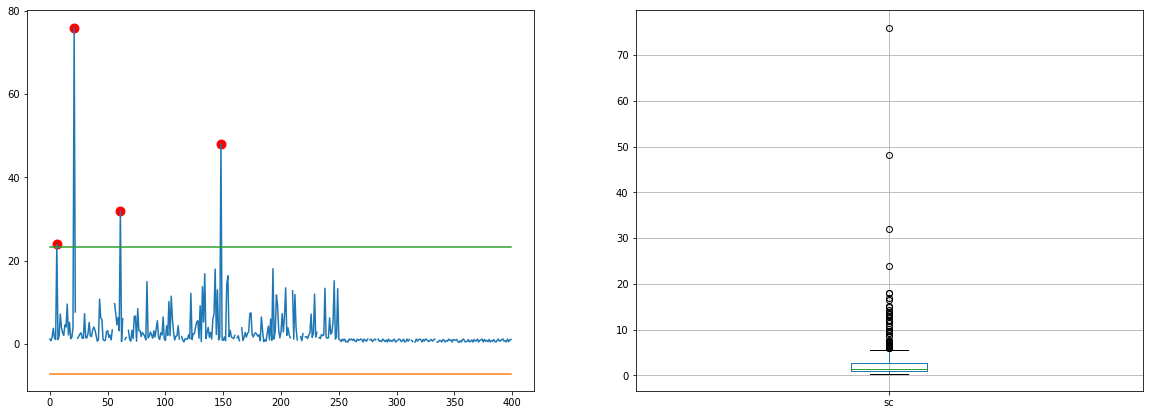

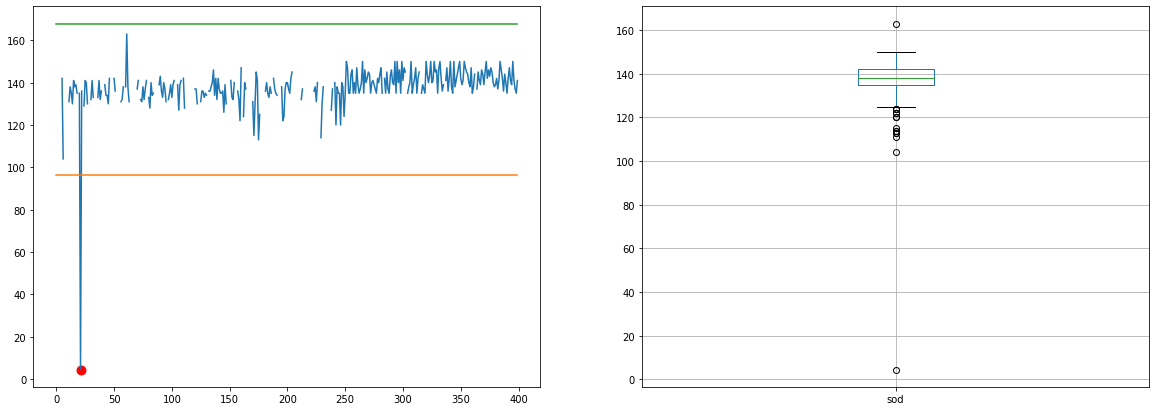

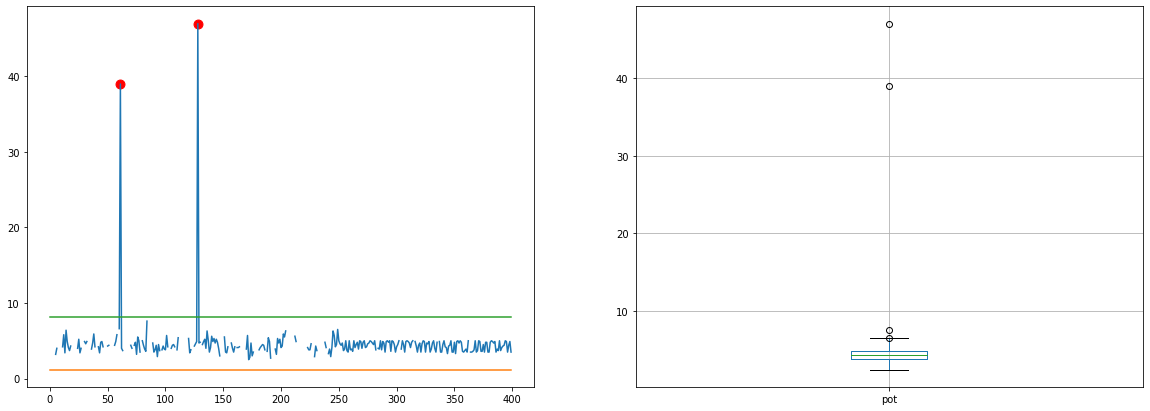

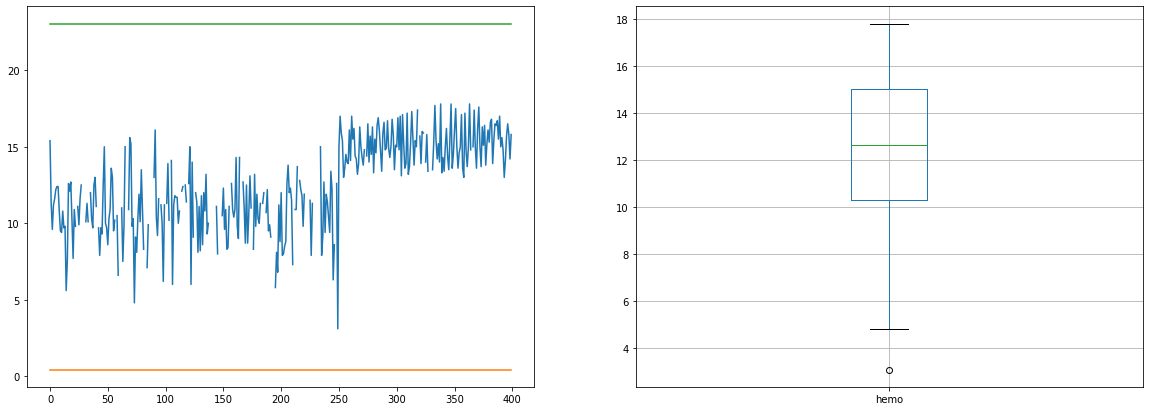

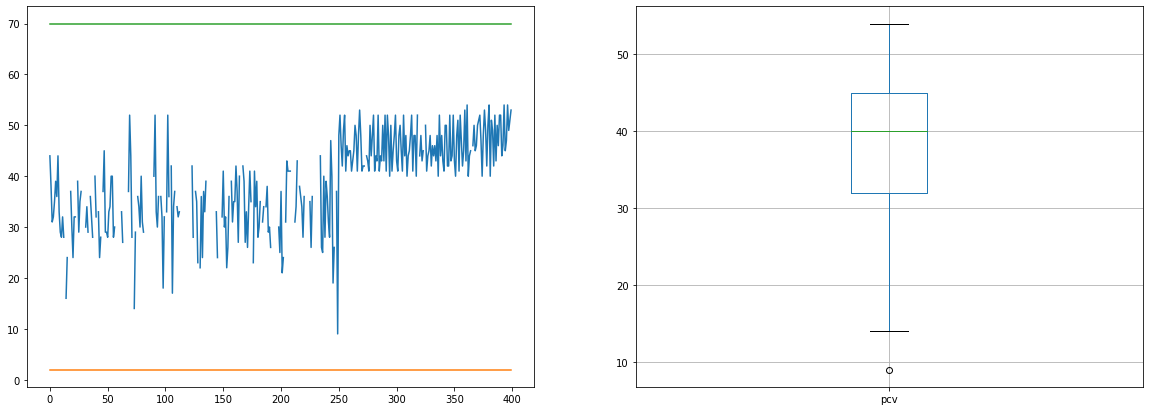

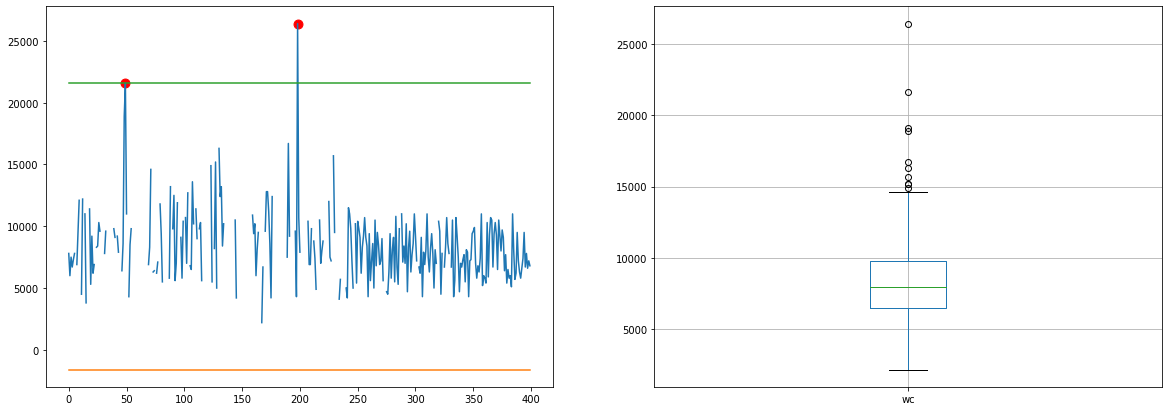

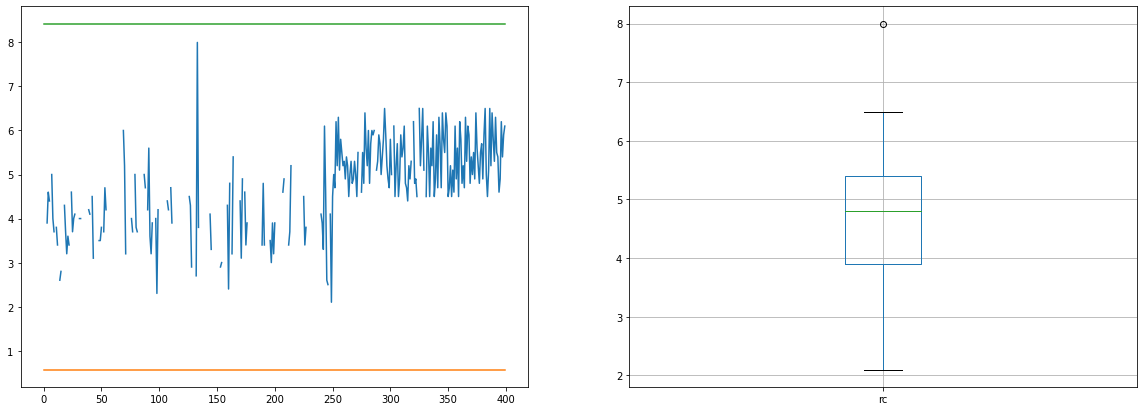

In [ ]:

dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
tot_out_indices=[]
i=0
for key in dtypes:
  if(key in numAtt and key!='su' and key != 'al' and key!='sg'):
    fig = plt.figure(i,figsize=(20,7))
    ax = fig.add_subplot(1, 2, 1)
    i+=1


    ax.plot(df[key])
    q5, q95 = np.percentile(df[key].dropna(), 2), np.percentile(df[key].dropna(), 98)
    iqr = q95 - q5
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q95 - cut_off, q5 + cut_off
    ax.plot(lower*np.ones(400))
    ax.plot(upper*np.ones(400))
    outliers = [x for x in df[key] if x < lower or x > upper]
    out_indices = [ind for ind in range(df.shape[0]) if df.loc[ind,key] < lower or df.loc[ind,key] > upper]
    ax.scatter(out_indices,outliers,color='r',s=80)
    tot_out_indices.extend(out_indices)
    outliers_removed = [x for x in df[key] if x > lower and x < upper]

    ax = fig.add_subplot(1, 2, 2)
    df.boxplot(key)

    print('Identified outliers in {}: {} {}'.format(key,len(outliers),outliers))
tot_out_indices = np.unique(tot_out_indices)
print(tot_out_indices)
df.drop(tot_out_indices, axis=0,inplace=True)

### **Correlation Study**


https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3


In [ ]:
uncorrelatedAtt={}
min_corr=0.26
for att in df.columns:
  uncorrelatedAtt[att]=True

max_corr=0.75
corratt={}

#### **Univariate Correlation between numerical-input numerical-output**



##### **Pearson method for linear relation**

In [ ]:
a=np.abs(df[numAtt].corr())
corratt={}
imtnt_att={}

for att in numAtt:
  k = a.loc[att].sort_values(ascending=False)
  imtnt_att[att] = []
  if k[1]>min_corr:
    uncorrelatedAtt[att] = False
  for p,b in k.items():
    if b<1:
      imtnt_att[att].append((p,b))
      if( (p,att) not in corratt.keys() and b>max_corr):
        corratt[(att,p)] = b


print(imtnt_att) 
print(corratt)
display(a)

{'age': [('rc', 0.2695364902471841), ('bgr', 0.2454526130302295), ('pcv', 0.24078590965793994), ('su', 0.21968426352654624), ('bu', 0.200534116863117), ('hemo', 0.1919193258662538), ('sg', 0.1838991719548266), ('bp', 0.1793483014492063), ('sc', 0.1330034171769071), ('al', 0.12106353874154963), ('sod', 0.11539905053774387), ('wc', 0.11525681796628238), ('pot', 0.10395377952979702)], 'bp': [('pcv', 0.3076407387487501), ('hemo', 0.2995527886292971), ('sc', 0.2732535638774322), ('rc', 0.23149315375466417), ('sg', 0.22499258367151265), ('bu', 0.20458939936086062), ('age', 0.1793483014492063), ('al', 0.17196236691393155), ('su', 0.15227871892851527), ('bgr', 0.13563704821067005), ('sod', 0.13437307210378868), ('pot', 0.12064956083226776), ('wc', 0.008634087635978699)], 'sg': [('pcv', 0.605949924810257), ('hemo', 0.604001982615486), ('rc', 0.5777316429773416), ('al', 0.48383319092803595), ('sod', 0.43412239207463416), ('bgr', 0.38137695364351915), ('sc', 0.3683538921665257), ('bu', 0.31942428

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.179348,0.183899,0.121064,0.219684,0.245453,0.200534,0.133003,0.115399,0.103954,0.191919,0.240786,0.115257,0.269536
bp,0.179348,1.000000,0.224993,0.171962,0.152279,0.135637,0.204589,0.273254,0.134373,0.120650,0.299553,0.307641,0.008634,0.231493
sg,0.183899,0.224993,1.000000,0.483833,0.298041,0.381377,0.319424,0.368354,0.434122,0.049295,0.604002,0.605950,0.256287,0.577732
al,0.121064,0.171962,0.483833,1.000000,0.272824,0.377069,0.463851,0.477926,0.498594,0.099785,0.629648,0.602792,0.230003,0.552669
su,0.219684,0.152279,0.298041,0.272824,1.000000,0.715752,0.142592,0.221478,0.188382,0.049795,0.216312,0.224856,0.185215,0.222452
bgr,0.245453,0.135637,0.381377,0.377069,0.715752,1.000000,0.149235,0.154250,0.305553,0.007209,0.308316,0.300349,0.133354,0.280876
bu,0.200534,0.204589,0.319424,0.463851,0.142592,0.149235,1.000000,0.842701,0.456166,0.237492,0.615366,0.611067,0.122113,0.579626
sc,0.133003,0.273254,0.368354,0.477926,0.221478,0.154250,0.842701,1.000000,0.426906,0.232762,0.611970,0.606362,0.079032,0.580499
sod,0.115399,0.134373,0.434122,0.498594,0.188382,0.305553,0.456166,0.426906,1.000000,0.022419,0.528302,0.534501,0.065054,0.452035
pot,0.103954,0.120650,0.049295,0.099785,0.049795,0.007209,0.237492,0.232762,0.022419,1.000000,0.168957,0.231066,0.139087,0.193174


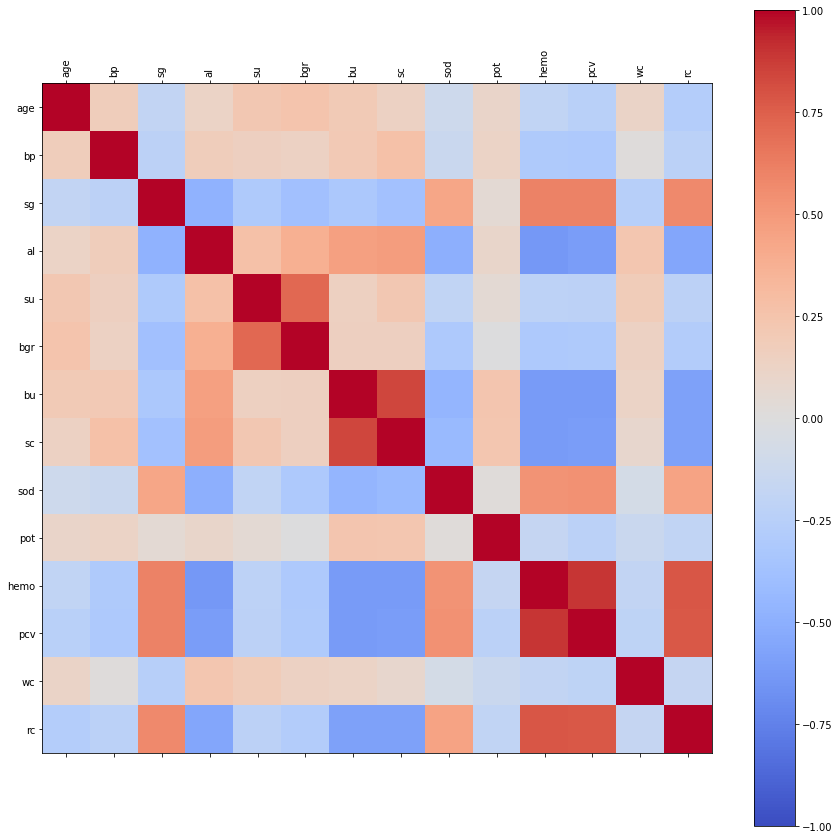

In [ ]:

df_corr = df[numAtt]  
corr = df_corr.corr()
fig = plt.figure( figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()

##### **Spearman method for nonlinear relation**

In [ ]:
a=np.abs(df[numAtt].corr(method='spearman'))

for att in numAtt:
  k= a.loc[att].sort_values(ascending=False)[1:6]
  if k[0]>min_corr:
    uncorrelatedAtt[att] = False
  k = k[k>max_corr] 

  if not k.empty :
    for p,b in k.items():
      if( (p,att) not in corratt.keys()):
        corratt[(att,p)] = b
print(corratt)
a

{('bu', 'sc'): 0.8427012125041987, ('hemo', 'pcv'): 0.8592463860998903, ('hemo', 'rc'): 0.7607975910172065, ('pcv', 'rc'): 0.7792311816049152}


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.131405,0.225873,0.214967,0.283273,0.298368,0.312534,0.344771,0.132848,0.069977,0.230920,0.288931,0.161220,0.296717
bp,0.131405,1.000000,0.207432,0.181228,0.191257,0.170479,0.170087,0.301712,0.123683,0.082555,0.257114,0.264661,0.033444,0.238247
sg,0.225873,0.207432,1.000000,0.527704,0.338631,0.377226,0.330793,0.553273,0.430811,0.072942,0.628449,0.628616,0.226436,0.578831
al,0.214967,0.181228,0.527704,1.000000,0.359109,0.362966,0.487043,0.640943,0.542599,0.028035,0.680101,0.657100,0.209689,0.612475
su,0.283273,0.191257,0.338631,0.359109,1.000000,0.588055,0.223891,0.353362,0.252975,0.029090,0.291719,0.293557,0.249865,0.297337
bgr,0.298368,0.170479,0.377226,0.362966,0.588055,1.000000,0.199457,0.358995,0.272909,0.059931,0.347404,0.345985,0.096132,0.320880
bu,0.312534,0.170087,0.330793,0.487043,0.223891,0.199457,1.000000,0.699745,0.409456,0.195626,0.581411,0.552295,0.128603,0.550306
sc,0.344771,0.301712,0.553273,0.640943,0.353362,0.358995,0.699745,1.000000,0.492624,0.115084,0.721404,0.709946,0.151826,0.632984
sod,0.132848,0.123683,0.430811,0.542599,0.252975,0.272909,0.409456,0.492624,1.000000,0.018092,0.499329,0.503877,0.016354,0.421900
pot,0.069977,0.082555,0.072942,0.028035,0.029090,0.059931,0.195626,0.115084,0.018092,1.000000,0.053410,0.133802,0.075231,0.098118


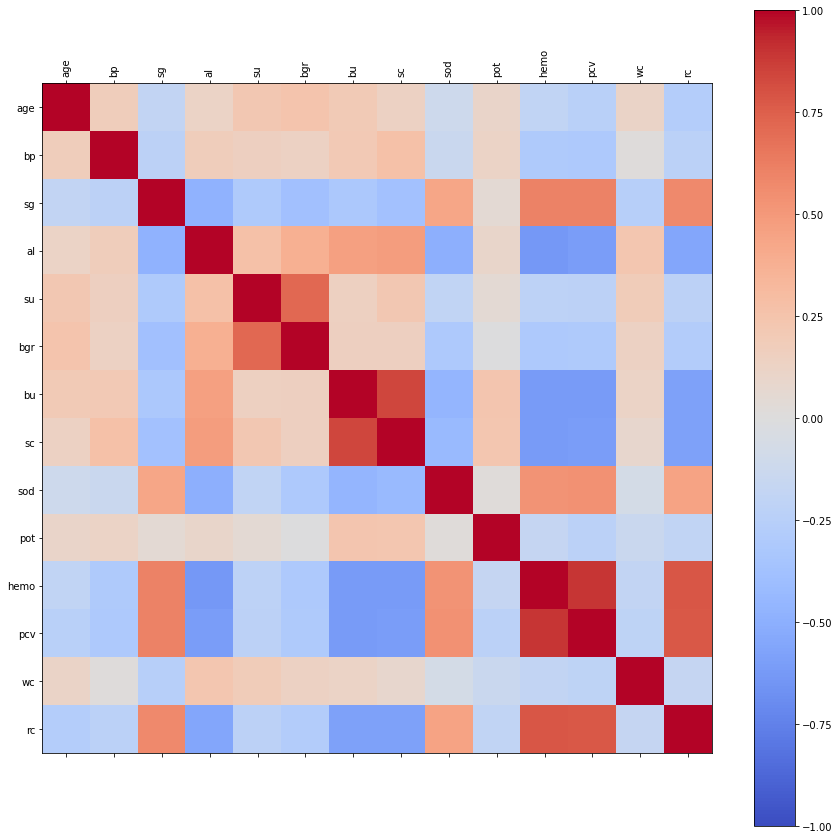

In [ ]:
df_corr = df[numAtt]  
corr = df_corr.corr()
fig = plt.figure( figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()


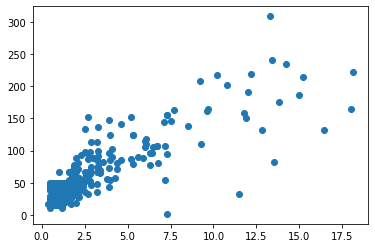

In [ ]:
plt.scatter(df['sc'],df['bu'])

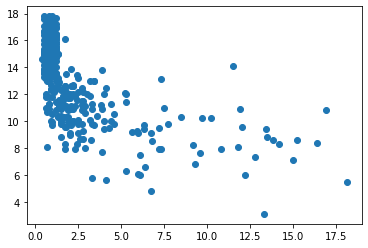

In [ ]:
plt.scatter(df['sc'],df['hemo'])

#### **Univariate Correlation between categorical-input categorical-output**

In [ ]:
a=np.abs(df[catAtt].corr())

for att in catAtt:
  k= a.loc[att].sort_values(ascending=False)[1:6]
  if k[0]>min_corr:
    uncorrelatedAtt[att] = False
  k = k[k>max_corr] 
  if not k.empty :
    for p,b in k.items():
      if( (p,att) not in corratt.keys()):
        corratt[(att,p)] = b
print(corratt)
display(a)

{('bu', 'sc'): 0.8427012125041987, ('hemo', 'pcv'): 0.8592463860998903, ('hemo', 'rc'): 0.7607975910172065, ('pcv', 'rc'): 0.7792311816049152}


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
rbc,1.000000,0.437301,0.119809,0.154390,0.311782,0.346737,0.167353,0.283009,0.303244,0.186936,0.568140
pc,0.437301,1.000000,0.527258,0.329410,0.372311,0.284650,0.211014,0.306956,0.410335,0.307726,0.456406
pcc,0.119809,0.527258,1.000000,0.288018,0.195804,0.162513,0.200859,0.188413,0.115154,0.168053,0.268877
ba,0.154390,0.329410,0.288018,1.000000,0.080995,0.069963,0.134681,0.139496,0.119467,0.030672,0.187083
htn,0.311782,0.372311,0.195804,0.080995,1.000000,0.597042,0.323115,0.321360,0.375629,0.335075,0.586723
dm,0.346737,0.284650,0.162513,0.069963,0.597042,1.000000,0.263569,0.309453,0.306680,0.158446,0.557426
cad,0.167353,0.211014,0.200859,0.134681,0.323115,0.263569,1.000000,0.158610,0.169893,0.036524,0.235437
appet,0.283009,0.306956,0.188413,0.139496,0.321360,0.309453,0.158610,1.000000,0.416248,0.241195,0.388260
pe,0.303244,0.410335,0.115154,0.119467,0.375629,0.306680,0.169893,0.416248,1.000000,0.219383,0.375512
ane,0.186936,0.307726,0.168053,0.030672,0.335075,0.158446,0.036524,0.241195,0.219383,1.000000,0.323117


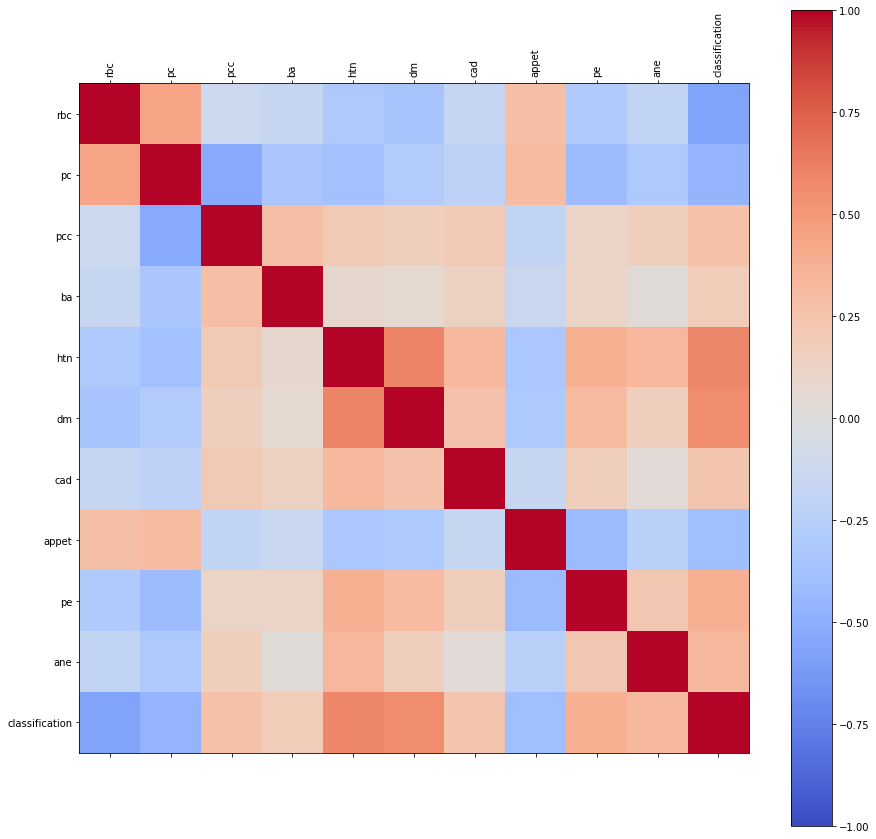

In [ ]:
df_corr = df[catAtt]  
corr = df_corr.corr()
fig = plt.figure( figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()

Ref: 

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

https://en.wikipedia.org/wiki/Phi_coefficient

In [ ]:
dfcorr = df[catAtt].corr()
dfcorr.loc[:,dfcorr.columns] = np.nan
for att in catAtt:
  for att1 in catAtt:
    re = pd.crosstab(df[att], df[att1])
    re['tot'] = re.sum(axis=1)
    re.loc['tot'] = re.sum(axis=0)
    #display(re)
    c = (re[0][0]*re[1][1] - re[1][0]*re[0][1])/(np.sqrt(re.tot[0]*re.tot[1]*re.loc['tot'][0]*re.loc['tot'][1]))
    #print("correlation between {} and {}: {}".format(att,att1,c))
    dfcorr.loc[att,att1] = c
      
display(dfcorr) 


  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
rbc,1.000000,0.437301,-0.119809,-0.154390,-0.311782,-0.346737,-0.167353,0.283009,-0.303244,-0.186936,-0.568140
pc,0.437301,1.000000,-0.527258,-0.329410,-0.372311,-0.284650,-0.211014,0.306956,-0.410335,-0.307726,-0.456406
pcc,-0.119809,-0.527258,1.000000,0.288018,0.195804,0.162513,0.200859,-0.188413,0.115154,0.168053,0.268877
ba,-0.154390,-0.329410,0.288018,1.000000,0.080995,0.069963,0.134681,-0.139496,0.119467,0.030672,0.187083
htn,-0.311782,-0.372311,0.195804,0.080995,1.000000,0.597042,0.323115,-0.321360,0.375629,0.335075,0.586723
dm,-0.346737,-0.284650,0.162513,0.069963,0.597042,1.000000,0.263569,-0.309453,0.306680,0.158446,0.557426
cad,-0.167353,-0.211014,0.200859,0.134681,0.323115,0.263569,1.000000,-0.158610,0.169893,0.036524,0.235437
appet,0.283009,0.306956,-0.188413,-0.139496,-0.321360,-0.309453,-0.158610,1.000000,-0.416248,-0.241195,-0.388260
pe,-0.303244,-0.410335,0.115154,0.119467,0.375629,0.306680,0.169893,-0.416248,1.000000,0.219383,0.375512
ane,-0.186936,-0.307726,0.168053,0.030672,0.335075,0.158446,0.036524,-0.241195,0.219383,1.000000,0.323117


#### **Univariate Correlation between numerical-input categorical-output**

As the categorical variables are ordinal, thus we can use the Kendall’s rank coefficient [https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/]

In [ ]:

corr = df.corr(method='kendall')
corr = np.abs(corr.loc[catAtt,numAtt])

#dic={}
#for att in numAtt:
#  for catt in catAtt:
#    k= corr.loc[catt,att]
#    if k<min_corr and catt=='classification':
#      dic[(catt,att)] = k
#print(dic)

for att in numAtt:
  for catt in catAtt:
    k= corr.loc[catt,att]
    if k>max_corr:
      corratt[(catt,att)] = k
print(corratt)



{('bu', 'sc'): 0.8427012125041987, ('hemo', 'pcv'): 0.8592463860998903, ('hemo', 'rc'): 0.7607975910172065, ('pcv', 'rc'): 0.7792311816049152}


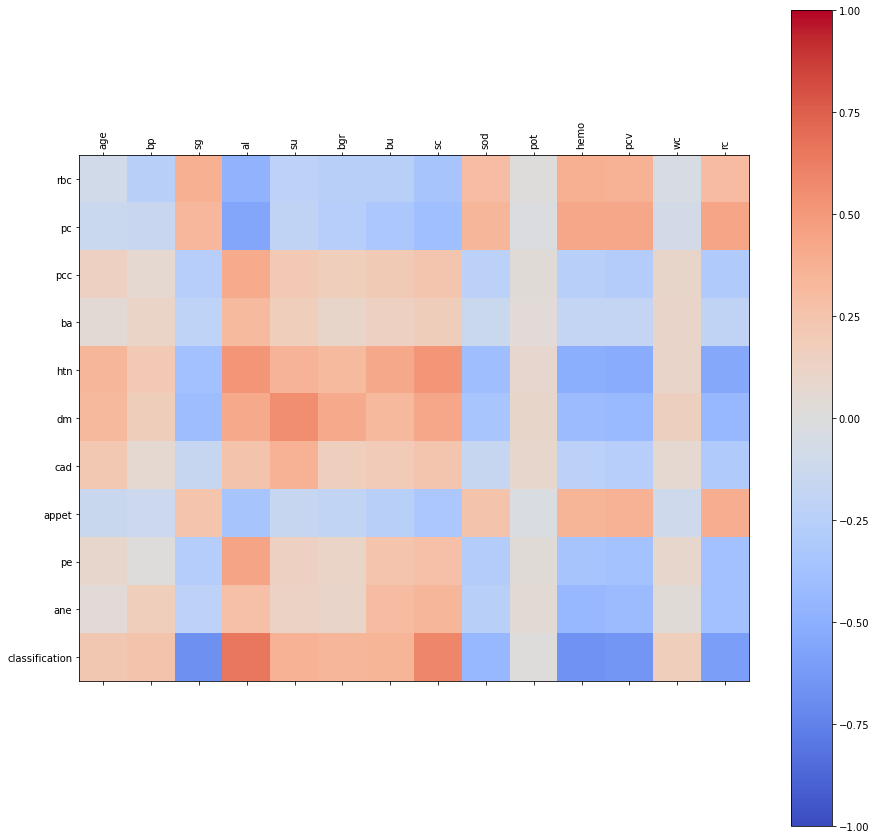

In [ ]:
corr = df.corr(method='kendall')

corr = corr.loc[catAtt,numAtt]
fig = plt.figure( figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
xticks = np.arange(0,len(numAtt),1)
yticks = np.arange(0,len(catAtt),1)
ax.set_xticks(xticks)
plt.xticks(rotation=90)
ax.set_yticks(yticks)
ax.set_xticklabels(numAtt)
ax.set_yticklabels(catAtt)
plt.show()

In [ ]:
corr

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
rbc,-0.083999,-0.243734,0.376308,-0.469655,-0.215015,-0.244001,-0.244041,-0.348540,0.292156,0.000092,0.382611,0.369561,-0.040931,0.311011
pc,-0.129944,-0.144445,0.328794,-0.547317,-0.202370,-0.260600,-0.321448,-0.383106,0.342986,-0.018748,0.429013,0.426867,-0.071481,0.434825
pcc,0.147774,0.065020,-0.261053,0.405037,0.207457,0.165855,0.195912,0.240462,-0.227675,0.027875,-0.251112,-0.275165,0.098529,-0.293972
ba,0.045371,0.110621,-0.205401,0.313942,0.164325,0.099937,0.147077,0.173851,-0.131452,0.038878,-0.173998,-0.171956,0.105019,-0.198571
htn,0.337882,0.208088,-0.374028,0.508669,0.353957,0.314473,0.419509,0.515282,-0.393236,0.083226,-0.504513,-0.522655,0.109217,-0.541227
dm,0.324793,0.172682,-0.401094,0.408056,0.547687,0.406886,0.323112,0.425807,-0.341841,0.097810,-0.415591,-0.424568,0.148691,-0.438074
cad,0.215318,0.066855,-0.162387,0.254174,0.366235,0.158736,0.189673,0.240638,-0.162255,0.091158,-0.233927,-0.259913,0.067417,-0.294827
appet,-0.139479,-0.118383,0.248739,-0.345633,-0.161283,-0.179761,-0.249040,-0.324519,0.256645,-0.026127,0.347607,0.363919,-0.103966,0.391000
pe,0.090646,0.005409,-0.271206,0.441694,0.143026,0.116939,0.243004,0.279459,-0.273661,0.025985,-0.347285,-0.362328,0.092317,-0.369848
ane,0.033477,0.171436,-0.215375,0.277480,0.127763,0.104691,0.299390,0.343125,-0.242842,0.054430,-0.439813,-0.416592,0.026835,-0.370293


In [ ]:
uncorrelatedAttr = pd.DataFrame.from_dict(uncorrelatedAtt,orient='index')
uncorrelatedAt = uncorrelatedAttr[uncorrelatedAttr[0]==True].index
for att in uncorrelatedAt:
  if att in catAtt:
    if corr.loc[att].sort_values(ascending=False)[0] > min_corr:
      uncorrelatedAt.drop(att)
  else:
    if np.abs(corr[att].sort_values(ascending=False)[0]) > min_corr:
      uncorrelatedAt.drop(att)
uncorrelatedAt

Index(['pot', 'wc'], dtype='object')

### **Feature Extraction**

We have studied in the section above the correlation between attributes. Using correlaion we can reduce nombre of variables by: 

- remove the atrributes havn't any correlation with others
- leave one of correlated attributes that have a high correlation and remove others 

#### **Uncorrelated attribute**

In [ ]:
print(uncorrelatedAt)
df.drop(uncorrelatedAt,axis=1,inplace=True)
for att in uncorrelatedAt:
  numAtt.remove(att)

Index(['pot', 'wc'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             381 non-null    float64
 1   bp              378 non-null    float64
 2   sg              347 non-null    float64
 3   al              347 non-null    float64
 4   su              344 non-null    float64
 5   bgr             348 non-null    float64
 6   bu              371 non-null    float64
 7   sc              373 non-null    float64
 8   sod             305 non-null    float64
 9   hemo            340 non-null    float64
 10  pcv             321 non-null    float64
 11  rc              262 non-null    float64
 12  rbc             243 non-null    float64
 13  pc              328 non-null    float64
 14  pcc             386 non-null    float64
 15  ba              386 non-null    float64
 16  htn             388 non-null    float64
 17  dm              388 non-null    flo

#### **Correlated attributes**

In [ ]:
print(corratt)

{('bu', 'sc'): 0.8427012125041987, ('hemo', 'pcv'): 0.8592463860998903, ('hemo', 'rc'): 0.7607975910172065, ('pcv', 'rc'): 0.7792311816049152}


we can se that the 3 attributes {'hemo','rc','pcv'} are correlated with each other so we will remove 2 of them and let the one have the lowest null values. Moreover, we will use the 2 attributes that will be removed to predict some null values in the rest one.

,bu,sc
54,NaN,3.4
134,NaN,16.9
378,NaN,0.9


,bu,sc
216,15.0,NaN


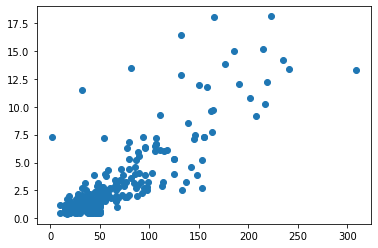

In [ ]:
plt.scatter(df['bu'],df['sc'])
display(df[['bu','sc']].loc[df['bu'].isnull()].dropna(subset=['sc'], how='all')) # missing values in pcv when we know hemo or rc
display(df[['bu','sc']].loc[df['sc'].isnull()].dropna(subset=['bu'], how='all')) # missing values in pcv when we know hemo or rc

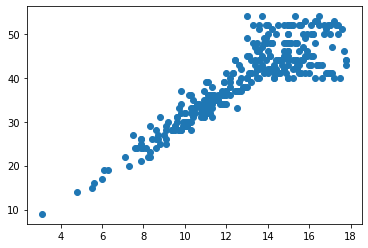

In [ ]:
plt.scatter(df['hemo'],df['pcv'])

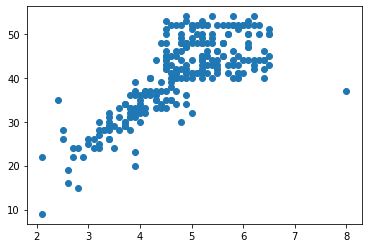

In [ ]:
plt.scatter(df['rc'],df['pcv'])

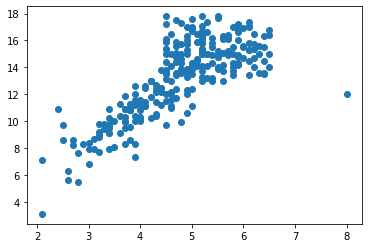

In [ ]:
plt.scatter(df['rc'],df['hemo'])

Using pearson correlation we can see that we have a linear relation between Hemoglobin(numerical) hemo in gms, Packed Cell Volume(numerical) pcv and Red blood cell rc. Thus we can this relation to get the missing values.

In [ ]:
p1 = df[['pcv','rc','hemo']].loc[df['pcv'].isnull()].dropna(subset=['rc', 'hemo'], how='all') # missing values in pcv when we know hemo or rc
p2 = df[['pcv','rc','hemo']].loc[df['rc'].isnull()].dropna(subset=['pcv', 'hemo'], how='all') # missing values in pcv when we know hemo or pcv
p3 = df[['pcv','rc','hemo']].loc[df['hemo'].isnull()].dropna(subset=['rc', 'pcv'], how='all') # missing values in pcv when we know pcv or rc

print("we can predict {} from {} of missing values in pcv if we know hemo and rc and it remains {} missing values".format(p1.shape[0],df.isnull().sum()['pcv'],df.isnull().sum()['pcv']-p1.shape[0]))
print("we can predict {} from {} of missing values in rc if we know hemo or pcv and it remains {} missing values".format(p2.shape[0],df.isnull().sum()['rc'],df.isnull().sum()['rc']-p2.shape[0]))
print("we can predict {} from {} of missing values in hemo if we know pcv or rc and it remains {} missing values".format(p3.shape[0],df.isnull().sum()['hemo'],df.isnull().sum()['hemo']-p3.shape[0]))

we can predict 24 from 69 of missing values in pcv if we know hemo and rc and it remains 45 missing values
we can predict 83 from 128 of missing values in rc if we know hemo or pcv and it remains 45 missing values
we can predict 5 from 50 of missing values in hemo if we know pcv or rc and it remains 45 missing values


So we can conclude that we can remove the 2 attributes pcv and rc which are represented by hemo.Moreover, those 2 variables have more missing values than hemo, thus it will be better to predict less nombre values in hemo.

### **Missing values**


#### Representing missing values

In [ ]:
print(df.isnull().sum())

df.info()

age                 9
bp                 12
sg                 43
al                 43
su                 46
bgr                42
bu                 19
sc                 17
sod                85
hemo               50
pcv                69
rc                128
rbc               147
pc                 62
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             381 non-null    float64
 1   bp              378 non-null    float64
 2   sg              347 non-null    float64
 3   al              347 non-null    float64
 4   su              344 non-null    float64
 5   bgr             348 non-null    float64
 6   bu         

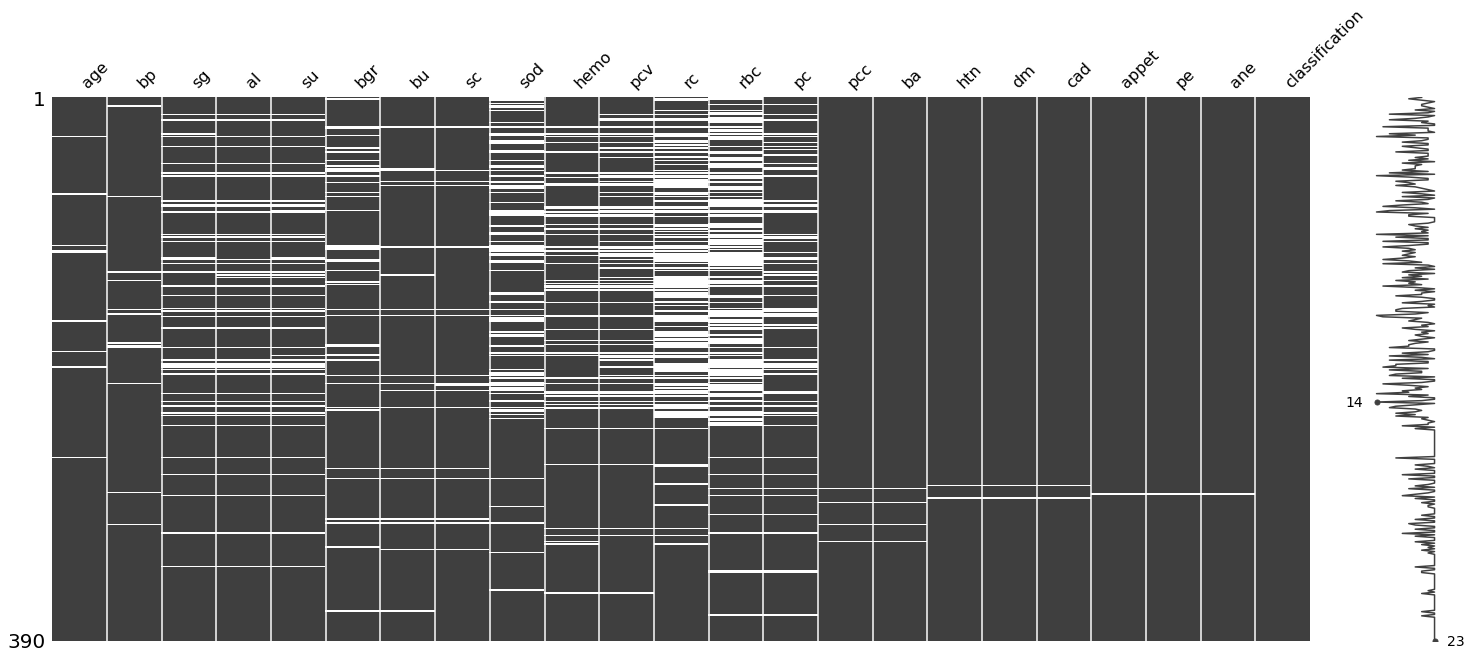

In [ ]:
msno.matrix(df)

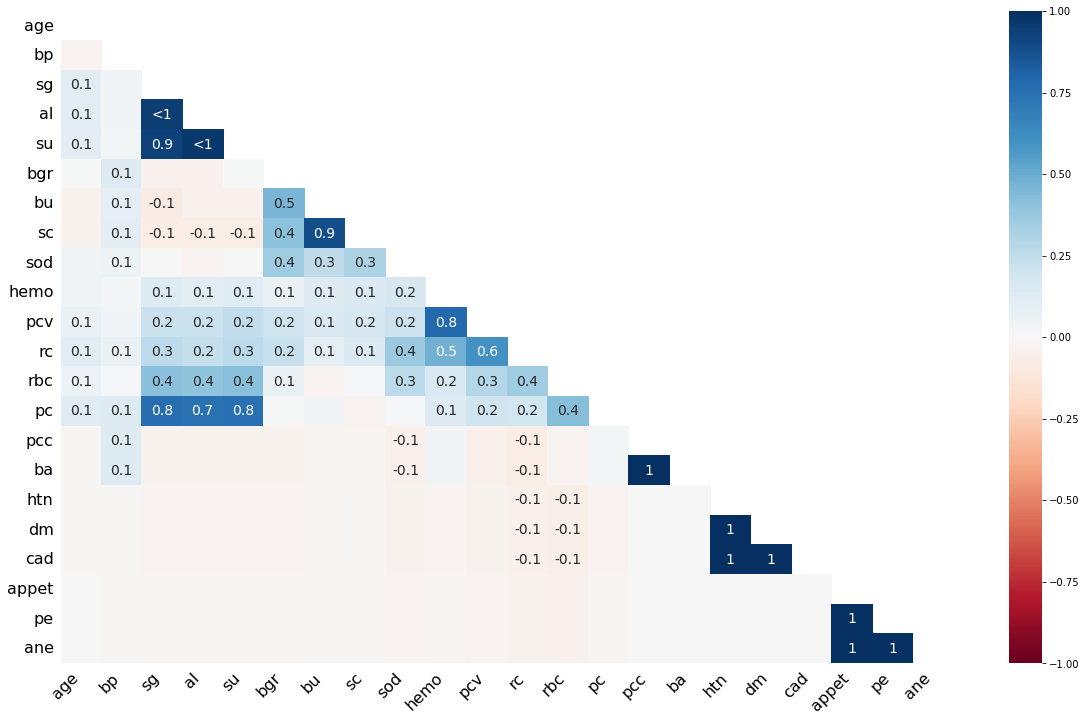

In [ ]:
msno.heatmap(df)

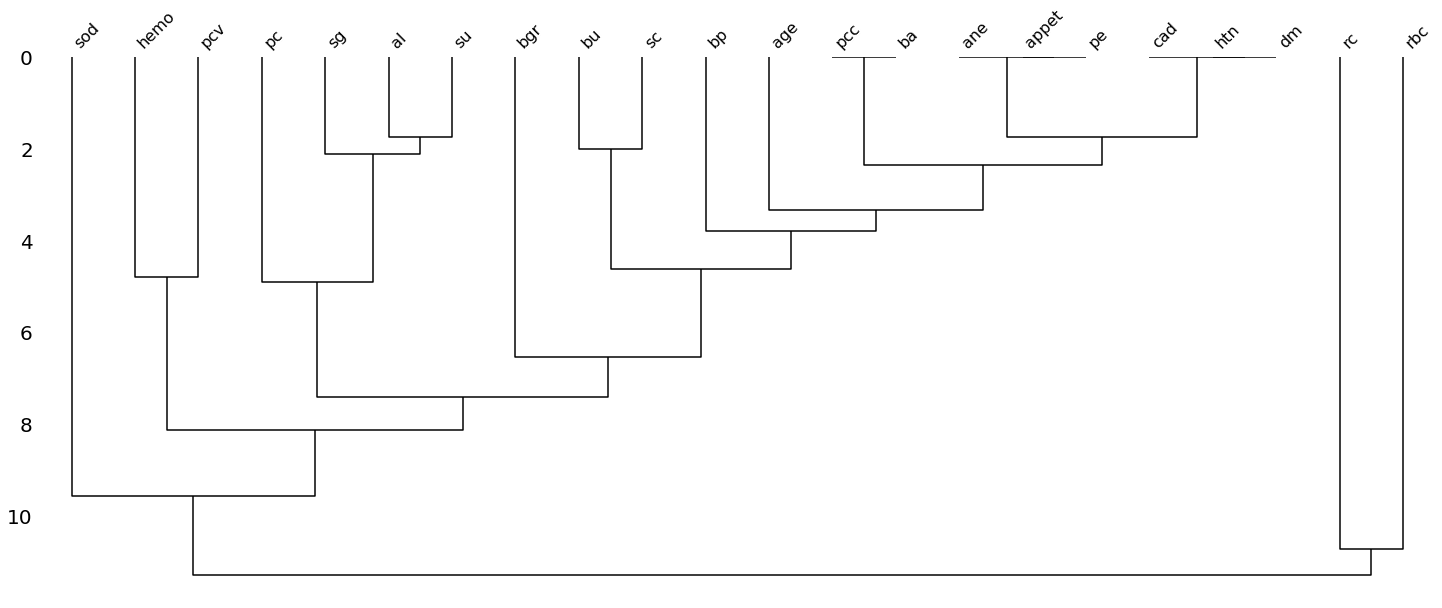

In [ ]:
msno.dendrogram(df.loc[:, df.isna().any()])

#### Applying different methods to handle missing values problem

##### 1. Delete Rows with Missing Values:

In [ ]:
df_DM = df.dropna()
df_DM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 3 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             157 non-null    float64
 1   bp              157 non-null    float64
 2   sg              157 non-null    float64
 3   al              157 non-null    float64
 4   su              157 non-null    float64
 5   bgr             157 non-null    float64
 6   bu              157 non-null    float64
 7   sc              157 non-null    float64
 8   sod             157 non-null    float64
 9   hemo            157 non-null    float64
 10  pcv             157 non-null    float64
 11  rc              157 non-null    float64
 12  rbc             157 non-null    float64
 13  pc              157 non-null    float64
 14  pcc             157 non-null    float64
 15  ba              157 non-null    float64
 16  htn             157 non-null    float64
 17  dm              157 non-null    flo

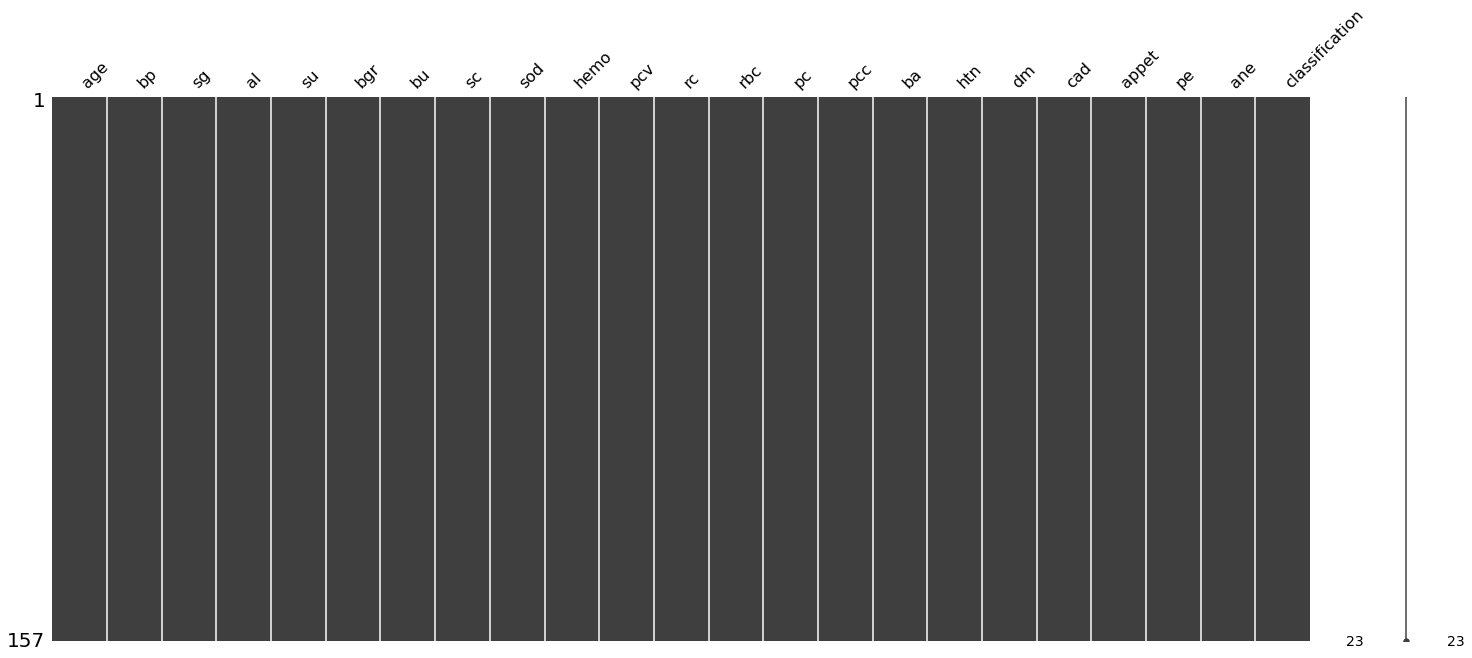

In [ ]:
msno.matrix(df_DM)

**Using this method the data becomes much smaller with 158 rows, so it's better to use another approach to handle our concern.**

##### 2. Impute missing values with Mean/Median/Mode (Numerical and categorical values):
Using this method could efficient when number of missing values is small, but having a large number could affect our prediction; hence we will impute missing values with mean/median/mode when the number is less than 10.

In [ ]:

dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
objAttr=[]
binaryObjects=[]
naryObjects=[]
for key in dtypes:
  if(dtypes[key] == 'float64' and df.isnull().sum()[key] < 10):
    df[key] = df[key].replace(np.NaN,  df[key].mean())  # fill missing values with the mean or median
  elif(dtypes[key] == 'object' and df.isnull().sum()[key] < 10):
    df[key] = df[key].fillna(df[key].mode()[0])  # fill categorical missing values with the most frequent category
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             390 non-null    float64
 1   bp              378 non-null    float64
 2   sg              347 non-null    float64
 3   al              347 non-null    float64
 4   su              344 non-null    float64
 5   bgr             348 non-null    float64
 6   bu              371 non-null    float64
 7   sc              373 non-null    float64
 8   sod             305 non-null    float64
 9   hemo            340 non-null    float64
 10  pcv             321 non-null    float64
 11  rc              262 non-null    float64
 12  rbc             243 non-null    float64
 13  pc              328 non-null    float64
 14  pcc             390 non-null    float64
 15  ba              390 non-null    float64
 16  htn             390 non-null    float64
 17  dm              390 non-null    flo

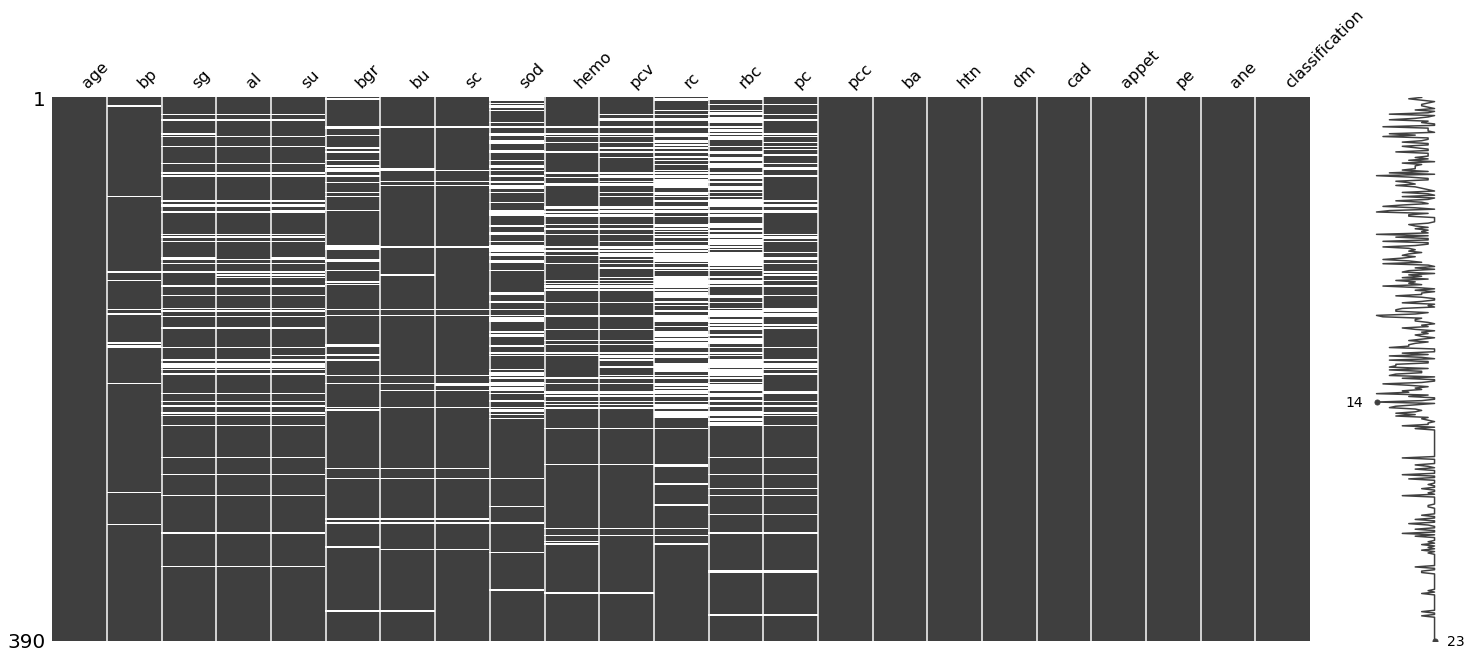

In [ ]:
msno.matrix(df)

##### 3. Fill the missing values by prediction:
In this method we will predict the missing values using other attributes, especially the correlated attributes.

1. hemo/pcv/rc are correlated so we will predict as possible missing values in hemo using pcv and rc

In [ ]:
# predict hemo missing values knowing pcv
x_train = df.dropna(subset=['pcv','hemo'])['pcv'].to_numpy()
y_train = df.dropna(subset=['pcv','hemo'])['hemo'].to_numpy()
 
x_test = df[['pcv','hemo']].loc[df['hemo'].isnull()].dropna(subset=['pcv'])['pcv']
ind = np.array(x_test.index)

if not x_test.empty:
  reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)

  y_pred = reg.predict(x_test.to_numpy().reshape(-1, 1))
  df.loc[ind,'hemo'] = y_pred


# predict hemo missing values knowing rc
x_train = df.dropna(subset=['rc','hemo'])['rc'].to_numpy()
y_train = df.dropna(subset=['rc','hemo'])['hemo'].to_numpy()

x_test = df[['rc','hemo']].loc[df['hemo'].isnull()].dropna(subset=['rc'])['rc']
ind = np.array(x_test.index)

if not x_test.empty:
  reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)

  y_pred = reg.predict(x_test.to_numpy().reshape(-1, 1))
  df.loc[ind,'hemo'] = y_pred

df.drop(['pcv','rc'],axis=1,inplace=True)
numAtt.remove('pcv')
numAtt.remove('rc')

In [ ]:
df.isnull().sum().sum()

561

2. bu/sc are correlated so we will predict as possible missing values.

In [ ]:
# predict bu missing values knowing sc
x_train = df.dropna(subset=['bu','sc'])['sc'].to_numpy()
y_train = df.dropna(subset=['bu','sc'])['bu'].to_numpy()
 
x_test = df[['bu','sc']].loc[df['bu'].isnull()].dropna(subset=['sc'])['sc']
ind = np.array(x_test.index)

if not x_test.empty:
  reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)

  y_pred = reg.predict(x_test.to_numpy().reshape(-1, 1))
  df.loc[ind,'bu'] = y_pred

# predict sc missing values knowing bu
x_train = df.dropna(subset=['bu','sc'])['bu'].to_numpy()
y_train = df.dropna(subset=['bu','sc'])['sc'].to_numpy()
 
x_test = df[['bu','sc']].loc[df['sc'].isnull()].dropna(subset=['bu'])['bu']
ind = np.array(x_test.index)

if not x_test.empty:
  reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)

  y_pred = reg.predict(x_test.to_numpy().reshape(-1, 1))
  df.loc[ind,'sc'] = y_pred

#df.drop(['bu'],axis=1,inplace=True)
#numAtt.remove('bu')

In [ ]:
df.isnull().sum().sum()

557

3. For the remaining missing values we will use the impute method from the sklearn library.

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             390 non-null    float64
 1   bp              390 non-null    float64
 2   sg              390 non-null    float64
 3   al              390 non-null    float64
 4   su              390 non-null    float64
 5   bgr             390 non-null    float64
 6   bu              390 non-null    float64
 7   sc              390 non-null    float64
 8   sod             390 non-null    float64
 9   hemo            390 non-null    float64
 10  rbc             390 non-null    float64
 11  pc              390 non-null    float64
 12  pcc             390 non-null    float64
 13  ba              390 non-null    float64
 14  htn             390 non-null    float64
 15  dm              390 non-null    float64
 16  cad             390 non-null    float64
 17  appet           390 non-null    flo

### **Features Scaling**

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

https://medium.datadriveninvestor.com/methods-and-uses-of-feature-scaling-94a44b43181a

#### 1. Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_S = df.copy()
dtypes = df_S.dtypes.apply(lambda x: x.name).to_dict()
df_S[numAtt] = sc.fit_transform(df_S[numAtt])
      
df_S.mean()
df=df_S.copy()

#### 2. Min-Max Scaling:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_M = df.copy()

dtypes = df_M.dtypes.apply(lambda x: x.name).to_dict()
df_M[numAtt] = sc.fit_transform(df_M[numAtt])
      
df_M.head()


,age,bp,sg,al,su,bgr,bu,sc,sod,hemo,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,0.522727,0.428571,0.75,0.25,0.0,0.211538,0.112195,0.056713,0.743590,0.836735,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,1.00,0.0,0.188889,0.053659,0.034387,0.682051,0.557823,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.681818,0.428571,0.25,0.50,0.6,0.856838,0.167480,0.090203,0.605128,0.442177,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.522727,0.285714,0.00,1.00,0.0,0.202991,0.177236,0.201834,0.000000,0.551020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.428571,0.25,0.50,0.0,0.179487,0.079675,0.067876,0.702564,0.578231,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## **ML Models with evalutaion**

In [ ]:
features = df_S
labels = np.array(features['classification'])
# Remove the labels from the features
features= features.drop('classification', axis = 1)

In [ ]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

### K-Nearest Neighbors

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_features, train_labels)


predictions = neigh.predict(test_features)


In [ ]:
cf_matrix= confusion_matrix(test_labels,predictions)
tn, fp, fn, tp = cf_matrix.ravel()

In [ ]:
accuracy= (tn+tp) / (tn+ fp+ fn+ tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Accuracy: 0.9591836734693877
Precision: 1.0
Recall: 0.9375


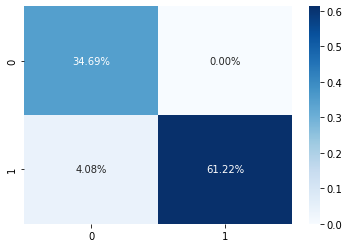

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

### Descision tree

In [ ]:

from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(train_features, train_labels)


# Predict
predictions = regr_1.predict(test_features)



In [ ]:
cf_matrix= confusion_matrix(test_labels,predictions)
tn, fp, fn, tp = cf_matrix.ravel()

In [ ]:
accuracy= (tn+tp) / (tn+ fp+ fn+ tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Accuracy: 0.9897959183673469
Precision: 0.9846153846153847
Recall: 1.0


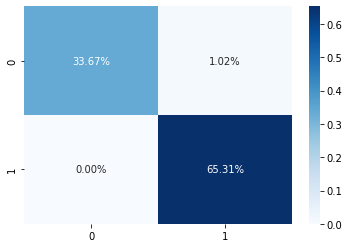

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

### Random Forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
predictions = np.around(predictions)


In [ ]:
cf_matrix= confusion_matrix(test_labels,predictions)
tn, fp, fn, tp = cf_matrix.ravel()

In [ ]:
accuracy= (tn+tp) / (tn+ fp+ fn+ tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Accuracy: 0.9897959183673469
Precision: 1.0
Recall: 0.984375


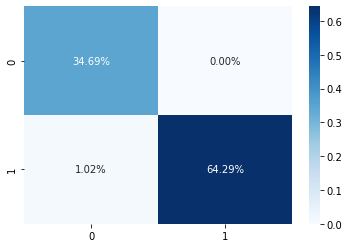

In [ ]:
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')